## How to complete a Kaggle Competition with Machine Learning

In this code along session, you'll build several algorithms of increasing complexity that predict whether any given passenger on the Titanic survived or not, given data on them such as the fare they paid, where they embarked and their age.

<img src="img/nytimes.jpg" width="500">

In particular, you'll build _supervised learning_ models. _Supervised learning_ is the branch of machine learning (ML) that involves predicting labels, such as 'Survived' or 'Not'. Such models:

* it learns from labelled data, e.g. data that includes whether a passenger survived (called model training).
* and then predicts on unlabelled data.

On Kaggle, a platform for predictive modelling and analytics competitions, these are called train and test sets because

* You want to build a model that learns patterns in the training set
* You _then_ use the model to make predictions on the test set!

Kaggle then tells you the **percentage that you got correct**: this is known as the _accuracy_ of your model.

## Approach

A good way to approach supervised learning:

* Exploratory Data Analysis (EDA);
* Build a quick and dirty model (baseline);
* Iterate;
* Engineer features;
* Get model that performs better.

In this code along session, we'll do all of these! We also have free courses that get you up and running with machine learning for the Titanic dataset in [Python](https://campus.datacamp.com/courses/kaggle-python-tutorial-on-machine-learning) and [R](https://campus.datacamp.com/courses/kaggle-r-tutorial-on-machine-learning).

**Note:** We may move quickly at some points in order to get a bit further along. I'll answer questions in the live event but also feel free to chime in and help each other in the comments.

## Import you data and check it out

In [46]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [5]:
# Import test and train datasets
df_train = pd.read_csv("/Users/Brice/Desktop/TitanicTutorial/datacamp_facebook_live_titanic/data/train.csv")
df_test = pd.read_csv("/Users/Brice/Desktop/TitanicTutorial/datacamp_facebook_live_titanic/data/test.csv")

# View first lines of training data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* What are all these features? Check out the Kaggle data documentation [here](https://www.kaggle.com/c/titanic/data).

**Important note on terminology:** 
* The _target variable_ is the one you are trying to predict;
* Other variables are known as _features_ (or _predictor variables_).

In [4]:
# View first lines of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* Use the DataFrame `.info()` method to check out datatypes, missing values and more (of `df_train`).

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Use the DataFrame `.describe()` method to check out summary statistics of numeric columns (of `df_train`).

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Recap:**
* you've loaded your data and had a look at it.

**Up next:** Explore your data visually and build a first model!

For more on `pandas`, check out our [Data Manipulation with Python track](https://www.datacamp.com/tracks/data-manipulation-with-python). 

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).

## Visual exploratory data analysis and your first model

* Use `seaborn` to build a bar plot of Titanic survival (your _target variable_).

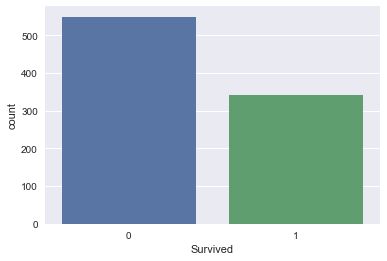

In [10]:
sns.countplot(x='Survived', data=df_train);

**Take-away:** In the training set, less people survived than didn't. Let's then build a first model that **predict that nobody survived**.

This is a bad model as we know that people survived. But it gives us a _baseline_: any model that we build later needs to do better than this one.

* Create a column 'Survived' for `df_test` that encodes 'did not survive' for all rows;
* Save 'PassengerId' and 'Survived' columns of `df_test` to a .csv and submit to Kaggle.

In [14]:
df_test['Survived'] = 0
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/no_surivors.csv', index=False)

* What accuracy did this give you?

Accuracy on Kaggle = 62.7

**Essential note!** There are metrics other than accuracy that you may want to use.

**Recap:**
* you've loaded your data and had a look at it.
* you've explored your target variable visually and made your first predictions.

**Up next:** More EDA and you'll build another model.

## EDA on feature variables

* Use `seaborn` to build a bar plot of the Titanic dataset feature 'Sex' (of `df_train`).

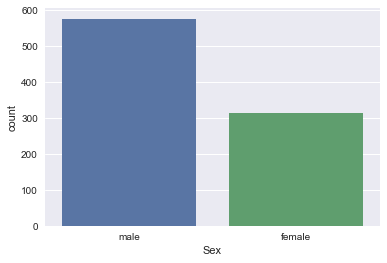

In [20]:
sns.countplot(x='Sex', data=df_train);

* Use `seaborn` to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'.

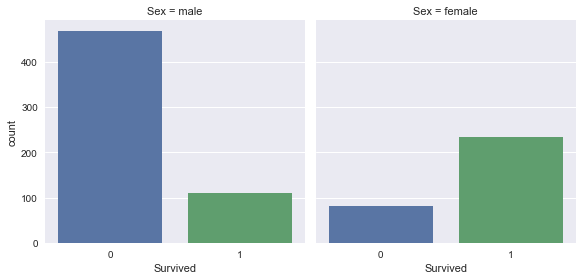

In [22]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);

**Take-away:** Women were more likely to survive than men.

* Use `pandas` to figure out how many women and how many men survived.

In [28]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

* Use `pandas` to figure out the proportion of women that survived, along with the proportion of men:

In [29]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.742038216561
0.188908145581


74% of women survived, while 18% of men survived.

Let's now build a second model and predict that all women survived and all men didn't. Once again, this is an unrealistic model, but it will provide a baseline against which to compare future models.

* Create a column 'Survived' for `df_test` that encodes the above prediction.
* Save 'PassengerId' and 'Survived' columns of `df_test` to a .csv and submit to Kaggle.

In [32]:
df_test['Survived'] = df_test.Sex == 'female'
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [33]:
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/women_survive.csv', index=False)

* What accuracy did this give you?

Accuracy on Kaggle = 76.6%

**Recap:**
* you've loaded your data and had a look at it.
* you've explored your target variable visually and made your first predictions.
* you've explored some of your feature variables visually and made more predictions that did better based on your EDA.

**Up next:** EDA of other feature variables, categorical and numeric.

For more on `pandas`, check out our [Data Manipulation with Python track](https://www.datacamp.com/tracks/data-manipulation-with-python). 

For more on `seaborn`, check out Chapter 3 of our [Intro. to Datavis with Python course](https://www.datacamp.com/courses/introduction-to-data-visualization-with-python).

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).

## Explore your data more!

* Use `seaborn` to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'.

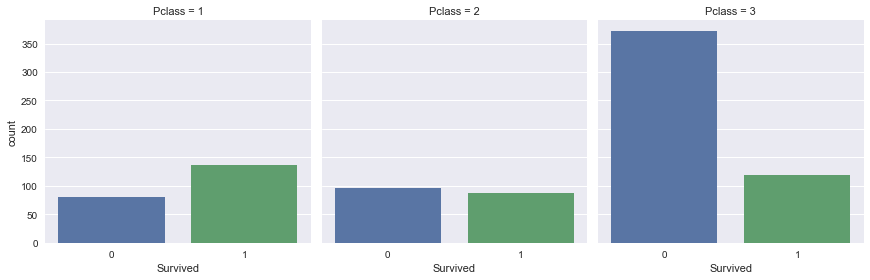

In [37]:
sns.factorplot(x='Survived', col='Pclass', data=df_train, kind='count');

**Take-away:** The probability of survival drastically decreases as you decrease in ticket class.

* Use `seaborn` to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'.

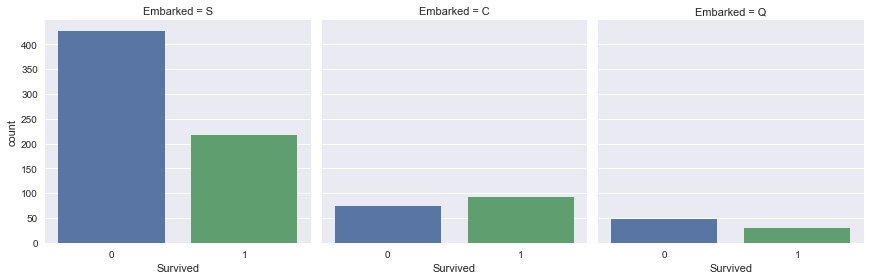

In [38]:
sns.factorplot(x='Survived', kind='count', col = 'Embarked', data=df_train);

**Take-away:** The majority of passengers embarked from 'S' and were also much less likely to survive

## EDA with numeric variables

* Use `seaborn` to plot a histogram of the 'Fare' column of `df_train`.

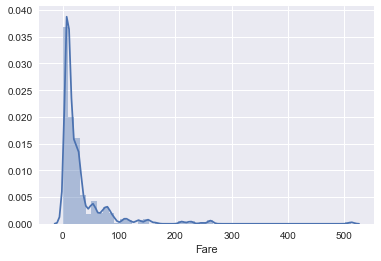

In [47]:
sns.distplot(df_train.Fare);

**Take-away:** Fare price distribution appears one sided

* Use a `pandas` plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.

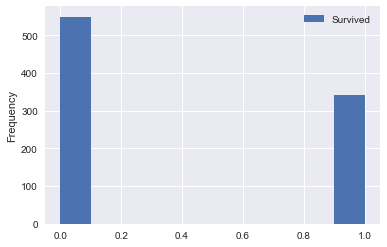

In [57]:
df_train.plot(x='Fare', y='Survived', kind='hist');

**Take-away:** [Include take-away from figure here]

* Use `seaborn` to plot a histogram of the 'Age' column of `df_train`. _Hint_: you may need to drop null values before doing so.

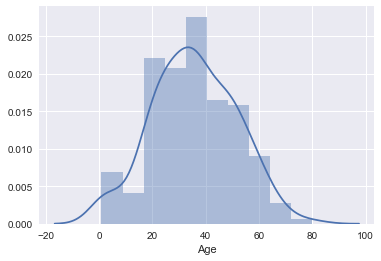

In [54]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age);

**Take-away:** [Include take-away from figure here]

* Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis.

In [ ]:
____

In [ ]:
____

**Take-away:** [Include take-away from figure here]

* Use the DataFrame method `.describe()` to check out summary statistics of 'Fare' as a function of survival.

In [ ]:
____

* Use `seaborn` to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'.

In [ ]:
____

**Take-away:** [Include take-away from figure here]

* Use `seaborn` to create a pairplot of `df_train`, colored by 'Survived'.

In [ ]:
____

**Take-away:** [Include take-away from figure here]

**Recap:**
* you've loaded your data and had a look at it.
* you've explored your target variable visually and made your first predictions.
* you've explored some of your feature variables visually and made more predictions that did better based on your EDA.
* you've done some serious EDA of feature variables, categorical and numeric.

**Up next:** Time to build some Machine Learning models, based on what you've learnt from your EDA here. Open the notebook `2-titanic_first_ML-model.ipynb`.

For more on `pandas`, check out our [Data Manipulation with Python track](https://www.datacamp.com/tracks/data-manipulation-with-python). 

For more on `seaborn`, check out Chapter 3 of our [Intro. to Datavis with Python course](https://www.datacamp.com/courses/introduction-to-data-visualization-with-python).

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).